# NASA Miscrosoft Rocket Launch Learning Path  <img src="launch_images/nasa.png"  width="90" height="90" align="right"><img src="launch_images/msft.jpg"  width="200" height="200" align="right">


### In this learning path, we will use artificial intelligence to decide if certain day is approprite for rocket launch or not.
for successful rocket launch, we have to make sure the weather and athmosphere conditions are all suitable for the launch. In this learning path we will analyze the historical rocket launches and built an AI system that decided if a certain day is a good day for launch or not. 

<img src="launch_images/rl1.jpg" width="600" align="center">

### Is a cloudy day good for launching rockets?
<img src="launch_images/cloudy.jpg" width="600" align="center">

### To decide if a certain day good for launch or not we have gathered the following data:
- Condition (Cloudy, partly cloudy, fair, rain, thunder, heavy storm)
- Tempreture 
- Tumidity 
- Wind speed 
- Wind direction
- Percipitation
- Visibility
- Sea Level Pressure
- and few more

And we will use the AI and Machine Learning algorithms to process these data to learn and discover patterns, then we will use these pattern to decide if a day is good for a rocket launch or not.

### In a future learning path, we will add the NASA satelite imagery data to better decide if the earth atmosphere conditions are good for launch
<img src="launch_images/sat.jpg" width="600" align="center">

## There are 4 steps that we have to follow for training an AI system:
These 4 steps are described in detail belwo

## Step 0:
> We have to collect as much data as possible
 - AI and Machine Learning systems need data to learn, without data they cannot learn anything!
 Therefore we first have to collect as much as data about launches as possible. For this learning path we have collected and used Microsoft excel to store them, here is a screenshot of the data collected. 

<img src="launch_images/excel.png" width="650" align="right">


## Step 1: <br> <img src="launch_images/dc.png" height="250" width="250" align="right">
 
Clean and organize the data

>In the read world, data is usually not clean and we need to grab a bruch and clean it. Cleaning the data means:
 - Take care of missing values
 - Use the approprite units for measuring different data 
 - Normalizing and Standardizing the data
 - Feature Engineering <br>
 


## Step 2:
> Next, we will build a machine learning algorithm to digest our data and find best weather patters for a launch 
- Machine learning algorithms take the data and return the insights about what are indicators of good rocket launch days
- We show these associations with links such as shown below:<br>


## Step 3:
> Our AI system will help to decide if we should launch a rocket or not. 
<br>
<img src="launch_images/mlmodel.png" width="650" align="right">


# Now lets write the codes for each of the 4 steps above:
------

## Step 0: 
>Lets Import the Libraries and data

In [317]:
# Pandas library is used for handling tabular data
import pandas as pd
# Numpy is used for handling numerial series operations (addition, multiplification and ...)
import numpy as np
# Sklearn library contain all the machine learning packages we need to digest and extract patterns from the data
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split

# Machine learning libaries used to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Sklearns preprocessing library is used for processing and cleaning the data 
from sklearn import preprocessing

# for vizualizing the tree
import pydotplus
from IPython.display import Image 


>Lets Import the data

In [318]:
lanch_data = pd.read_excel('weather/RocketLaunchDataCompleted.xlsx')
# We will check out the first 5 rows of the data imported to make sure we have read them correctly
lanch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN
3,NaN,1958-12-07,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25:00,Partly Cloudy,NaN
4,NaN,1958-12-08,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24:00,Partly Cloudy,NaN


In [319]:
# What are the columns available in our dataset
lanch_data.columns

Index(['Name', 'Date', 'Time (East Coast)', 'Location', 'Crewed or Uncrewed',
       'Launched?', 'High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Wind Direction', 'Max Wind Speed', 'Visibility',
       'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
       'Hist Ave Visibility', 'Sea Level Pressure',
       'Hist Ave Sea Level Pressure', 'Day Length', 'Condition', 'Notes'],
      dtype='object')

---
## Step 1: 
>Lets clean the data next 

<img src="launch_images/vac.jpg" width="350" align="right">

In [320]:
## To handle missing values, we will fill the missing values with appropriate values 
lanch_data['Launched?'].fillna('N',inplace=True)
lanch_data['Crewed or Uncrewed'].fillna('Uncrewed',inplace=True)
lanch_data['Wind Direction'].fillna('unknown',inplace=True)
lanch_data['Condition'].fillna('Fair',inplace=True)
lanch_data.fillna(0,inplace=True)
lanch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,Cloudy,0
1,0,1958-12-05,0,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,Cloudy,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,Cloudy,0
3,0,1958-12-07,0,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,Partly Cloudy,0
4,0,1958-12-08,0,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,Partly Cloudy,0


In [321]:
## As part of the data cleaning process we have to convert text data to numerical because computers only understand numbers
label_encoder = preprocessing.LabelEncoder()

# There are 3 columns that have categorical text info and we convert them to numbers
lanch_data['Crewed or Uncrewed'] = label_encoder.fit_transform(lanch_data['Crewed or Uncrewed'])
lanch_data['Wind Direction'] = label_encoder.fit_transform(lanch_data['Wind Direction'])
lanch_data['Condition'] = label_encoder.fit_transform(lanch_data['Condition'])

### Checkout our new clean and all numeric dataset:

In [322]:
lanch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,1,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,0,0
1,0,1958-12-05,0,Cape Canaveral,1,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,0,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,1,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,0,0
3,0,1958-12-07,0,Cape Canaveral,1,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,6,0
4,0,1958-12-08,0,Cape Canaveral,1,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,6,0


----
## Step 2: 
>Building a machine learning algorithm 

<img src="launch_images/ml.png" width="450" align="right">

In [323]:
# First we select the output we are interested in, in this case "launch" yes and no's. 
y=lanch_data['Launched?']
# removing the columns we are not interested in
lanch_data.drop(['Name','Date','Time (East Coast)','Location','Launched?','Hist Ave Sea Level Pressure','Sea Level Pressure','Day Length','Notes'],axis=1, inplace=True)
X=lanch_data

In [324]:
# list of variables that our machine learning algorithm is going to look at:
X.columns

Index(['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
       'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
       'Hist Ave Temp', 'Percipitation at Launch Time',
       'Hist Ave Percipitation', 'Wind Direction', 'Max Wind Speed',
       'Visibility', 'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
       'Hist Ave Visibility', 'Condition'],
      dtype='object')

In [325]:
# Create decision tree classifer 
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

# Fitting the model to the training data
tree_model.fit(X_train,y_train)

# Do prediction on test Data
y_pred=tree_model.predict(X_test)
print(y_pred)

['Y' 'N' 'N' 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N'
 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y'
 'N' 'N' 'N' 'N' 'N' 'N' 'N']


### Accuracy of our Machine Learning Tree is: 
<img src="launch_images/acc.jpg" width="350" align="right">


In [326]:
# Calculate accuracy
tree_model.score(X_test,y_test)

0.9508196721311475

### Lets Visualize our decision tree

----

In [327]:
# lets import a library for visualizing our decision tree
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names,class_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=class_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    return Image(graph.create_png())

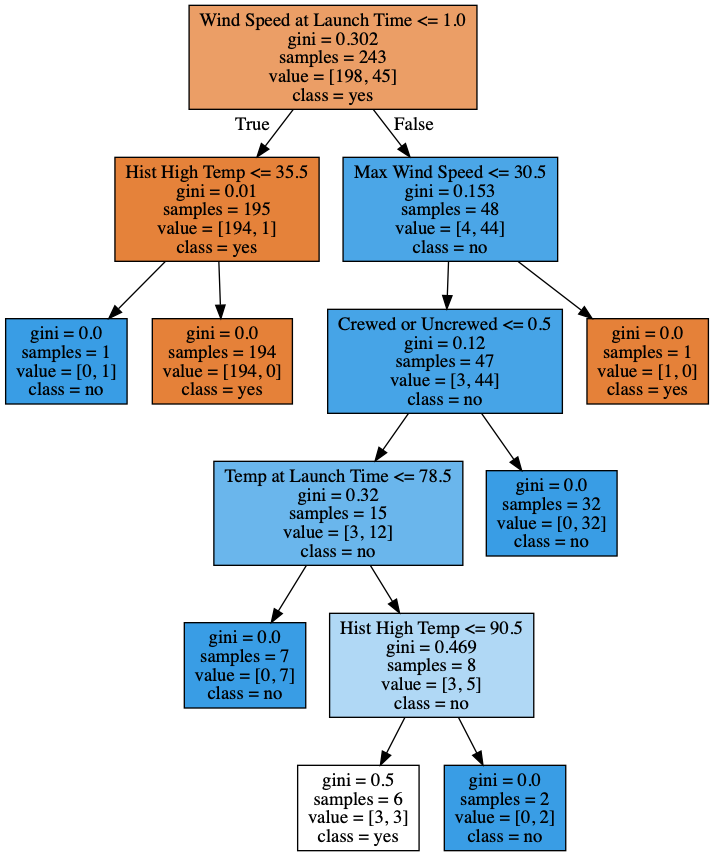

In [328]:
# this function takes a machine learning model and visualizes it
tree_graph_to_png(tree=tree_model, feature_names=X.columns.values,class_names=['yes','no'], png_file_to_save='decision_tree.png')

-----
## Step 3: 
>Lets predict if we should launch on a certain day


To do so we have to feed all the input data we have about a certain day and our smart tree decides if we should launch a rocket or not.
<img src="launch_images/mlmodel2.png" width="650" align="right">





In [329]:
# ['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
#        'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
#        'Hist Ave Temp', 'Percipitation at Launch Time',
#        'Hist Ave Percipitation', 'Wind Direction', 'Max Wind Speed',
#        'Visibility', 'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
#        'Hist Ave Visibility', 'Condition']

tree_model.predict([[ 1.  , 75.  , 68.  , 71.  ,  0.  , 75.  , 55.  , 65.  ,  0.  , 0.08,  0.  , 16.  , 15.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

array(['N'], dtype=object)

In [330]:
# N means "No Launch" and Y means "Yes Launch it". 